In [68]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from ast import literal_eval
from collections import Counter
import gower
from sklearn.feature_selection import VarianceThreshold

In [69]:
user_profile = pd.read_csv("data/user_profile/prepared/User_Profile_Null_Handled.csv")

In [70]:
user_profile.drop(["Unnamed: 0"],axis=1, inplace=True)

In [71]:
data = user_profile.iloc[:,[2,4,5,6,7,8,10,13,15,17,19,20,22,24,25,26,28,33,35,36,38,39,40,42,44,45,46,48,49,50,52,53,54,56,57,59,60,63,67,69,72,73,80,81,84,85,86,87,101,102,103,104,105,106,107,108,109,110,111]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42594 entries, 0 to 42593
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Voice_INCOMING_Scaled                 42594 non-null  float64
 1   Location_Identifier                   42594 non-null  object 
 2   Location_Node                         42594 non-null  object 
 3   Package_Type_and_Medium               42594 non-null  object 
 4   Model                                 42594 non-null  object 
 5   Service_Status                        42594 non-null  object 
 6   Voice_OUTGOING_Scaled                 42594 non-null  float64
 7   IDD_INCOMING_Scaled                   42594 non-null  float64
 8   IDD_incoming_country                  42594 non-null  object 
 9   IDD_OUTGOING_Scaled                   42594 non-null  float64
 10  IDD_outgoing_country                  42594 non-null  object 
 11  Peo_TV_Package 

In [72]:
data = data.sample(frac=0.3, random_state=10, ignore_index=True)

In [73]:
data_s["Sub_Type"].value_counts()

DOUBLE_PLAY_BV    7982
TRIPLE_PLAY       7941
SINGLE_PLAY       3449
DOUBLE_PLAY_PV    1889
4G                  36
Name: Sub_Type, dtype: int64

In [74]:
data.describe()

,Voice_INCOMING_Scaled,Voice_OUTGOING_Scaled,IDD_INCOMING_Scaled,IDD_OUTGOING_Scaled,PEO_TV_Scaled,BB_Scaled,AGE,GB_Amount,BB_Extra_GB_Purchased_Scaled,Peo_Extra_Channels_Purchased_Scaled,...,Peo_Packages_if_Senior_Citizen,Peo_Packages_if_Kids,Peo_Packages_if_Teenager_Students,Peo_Package_if_Working_Professionals,BB_Package_if_Working_Professionals,BB_Packages_if_Teenager_Students,BB_Packages_if_SMEss,VAS_if_Kids,VAS_if_Teenager_Students,VAS_if_Working_Professionals
count,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,12778.000000,...,12778.000000,12778.000000,12778.000000,12778.000000,12778.0,12778.0,12778.0,12778.000000,12778.000000,12778.000000
mean,0.116063,0.139967,0.020753,0.008652,0.229664,0.373412,54.307304,11.187666,0.003066,0.006016,...,0.001127,0.001362,0.005729,0.009970,0.0,0.0,0.0,0.006143,0.089725,0.127661
std,0.097810,0.120173,0.081895,0.050141,0.279353,0.341514,13.672774,39.349491,0.009943,0.048463,...,0.014971,0.017552,0.033549,0.052703,0.0,0.0,0.0,0.055083,0.166625,0.171401
min,0.001736,0.001736,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.032986,0.040196,0.000000,0.000000,0.000000,0.076389,45.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.094122,0.117010,0.000000,0.000000,0.000000,0.277778,54.297914,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,0.178075,0.201965,0.000000,0.000000,0.488889,0.611111,63.000000,6.000000,0.001691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000
max,0.944444,0.894097,0.922222,0.750000,0.800000,1.166667,99.000000,1455.000000,0.287762,0.450000,...,0.200000,0.400000,0.400000,0.600000,0.0,0.0,0.0,0.500000,1.000000,0.700000


### Correlations

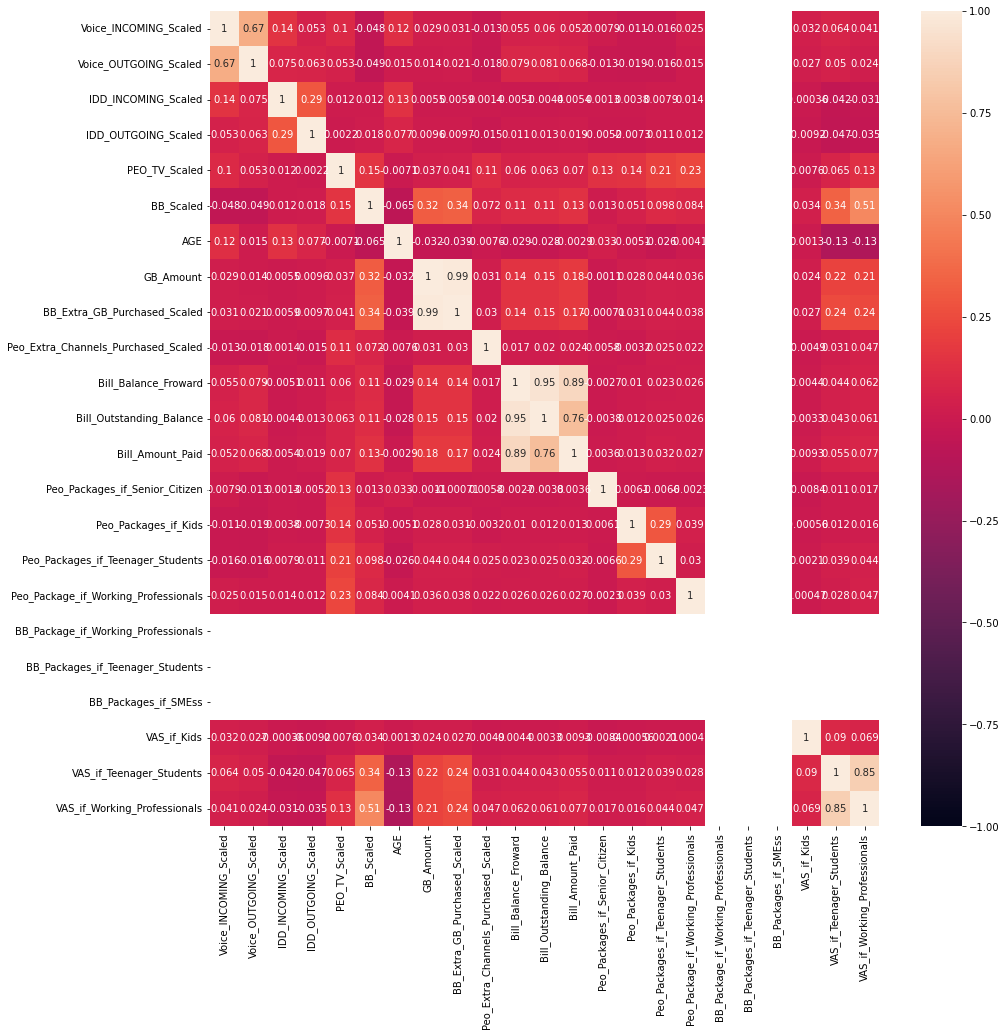

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

## Measuring Distances of Categorical Variables with Gower 

In [76]:
mp = []

for col in data.dtypes:
    if col == "float64":
        mp.append(False)
    else:
        mp.append(True)

In [77]:
len(mp)

59

In [78]:
dm = gower.gower_matrix(data, cat_features = mp )

In [79]:
dm.shape

(12778, 12778)

## Feature Selection

- Feature selector that removes all low-variance features.
- This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.
- docs: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

# Applying PCA

### Find most approporiate no of components

In [80]:
pc=PCA(n_components=59) 
pc.fit(dm)

PCA(n_components=59)

In [81]:
#How much variance,caputured individually
pc.explained_variance_

array([3.08122654e+01, 1.56079483e+01, 1.30196981e+01, 7.20403957e+00,
       3.25377703e+00, 1.29703963e+00, 1.07048810e+00, 8.00288975e-01,
       6.27417684e-01, 5.03095150e-01, 3.19259018e-01, 2.63315052e-01,
       2.40360245e-01, 2.25937515e-01, 1.88265428e-01, 1.49337664e-01,
       1.25959352e-01, 1.13747641e-01, 1.00866020e-01, 8.83293673e-02,
       6.15894087e-02, 5.94842359e-02, 5.29735945e-02, 4.79149781e-02,
       4.38956991e-02, 3.99368107e-02, 3.64517532e-02, 3.50903384e-02,
       3.21127512e-02, 3.08006406e-02, 2.96366233e-02, 2.82679405e-02,
       2.70368569e-02, 2.50818040e-02, 2.13365834e-02, 2.01029629e-02,
       1.72382239e-02, 1.56162912e-02, 1.52717289e-02, 1.41729927e-02,
       1.30596403e-02, 1.12125585e-02, 1.06062684e-02, 1.02791823e-02,
       8.39722622e-03, 7.12973811e-03, 6.86755264e-03, 6.49725785e-03,
       6.24345709e-03, 5.94639126e-03, 5.16702980e-03, 4.79190936e-03,
       4.64635342e-03, 4.46519209e-03, 4.34369780e-03, 4.11941996e-03,
      

In [82]:
#How mucb variance, captured together
cumsum_arr = pc.explained_variance_ratio_.cumsum() 

In [83]:
cumsum_arr

array([0.40071955, 0.603704  , 0.7730277 , 0.8667177 , 0.9090337 ,
       0.92590195, 0.93982387, 0.9502318 , 0.9583915 , 0.96493435,
       0.96908635, 0.9725108 , 0.9756367 , 0.9785751 , 0.98102355,
       0.9829657 , 0.9846038 , 0.98608315, 0.9873949 , 0.9885437 ,
       0.98934466, 0.99011827, 0.9908072 , 0.99143034, 0.99200124,
       0.99252063, 0.99299467, 0.993451  , 0.99386865, 0.9942692 ,
       0.9946546 , 0.99502224, 0.99537385, 0.99570006, 0.9959775 ,
       0.99623895, 0.9964631 , 0.9966662 , 0.9968648 , 0.9970491 ,
       0.9972189 , 0.9973647 , 0.9975026 , 0.9976363 , 0.9977455 ,
       0.99783826, 0.99792755, 0.99801207, 0.99809325, 0.99817055,
       0.9982377 , 0.9983001 , 0.9983605 , 0.99841857, 0.9984751 ,
       0.99852866, 0.9985782 , 0.9986253 , 0.9986707 ], dtype=float32)

In [84]:
pca_df = pd.DataFrame(data.columns.tolist(),columns=["Feature"])

In [85]:
pca_df["Importance"] = cumsum_arr

In [86]:
pca_df

,Feature,Importance
0,Voice_INCOMING_Scaled,0.400720
1,Location_Identifier,0.603704
2,Location_Node,0.773028
3,Package_Type_and_Medium,0.866718
4,Model,0.909034
5,Service_Status,0.925902
6,Voice_OUTGOING_Scaled,0.939824
7,IDD_INCOMING_Scaled,0.950232
8,IDD_incoming_country,0.958391
9,IDD_OUTGOING_Scaled,0.964934


/Users/chiranhewawitharana/mambaforge/envs/mactf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



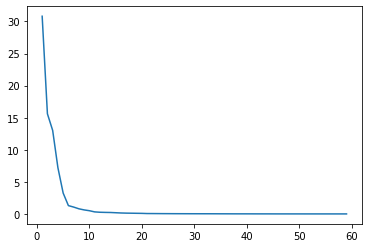

In [87]:
sns.lineplot(range(1,1+pc.explained_variance_.shape[0]),pc.explained_variance_)
plt.show()

In [88]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_2d = PCA(n_components=2)
pca_2d.fit(dm)
reduced_data = pca_2d.fit_transform(dm)
results_2d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_2d_df[['pca1','pca2']] = scaler.fit_transform(results_2d_df[['pca1','pca2']])

results = results_2d_df.values

In [89]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_3d = PCA(n_components=3)
pca_3d.fit(dm)
reduced_data = pca_3d.fit_transform(dm)
results_3d_df = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])

# applying min-max-scaler to reduced features
scaler = MinMaxScaler()
results_3d_df[['pca1','pca2','pca3']] = scaler.fit_transform(results_3d_df[['pca1','pca2','pca3']])

results_3d = results_3d_df.values

# Clustering

## Hierarchical f Clusters and Dendrogram
- Hierarchical Clustering

## Ward Linkage

In [ ]:
result = linkage(dm, method="ward") 

/var/folders/00/gmvdw06n48lgtsz126ng5y2m0000gn/T/ipykernel_20489/3267214036.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [ ]:
plt.figure(figsize=(20,20))
shc.dendrogram(result)
plt.show()

## Avarage Linkage

In [ ]:
hc_average = linkage(dm, "average")

plt.figure(figsize=(20, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average,
           leaf_font_size=10, 
           p=10,
           show_contracted=True,
          truncate_mode='level')
plt.show()

## Complete Linkage

In [ ]:
# Complete Linkage Method
hc_complete = linkage(dm, "complete")

plt.figure(figsize=(15, 10))
plt.title("Hierarchical Clustering")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

## F clusters

In [ ]:
ag_y_clusters = fcluster(result, 4, criterion='maxclust')
ag_y_clusters

In [ ]:
cluster_labels=["x",0,1,2,3]
val_dict = dict(zip(cluster_labels,np.bincount(ag_y_clusters)))
val_dict.pop("x")
val_dict

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = ag_y_clusters
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# Agglomerative Clustering - 4 Clusters (ward)

In [ ]:
acl=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [ ]:
acl.fit(dm)

In [ ]:
# cluster labels
acl_y_clusters = acl.labels_

In [ ]:
acl_y_clusters

In [ ]:
cluster_labels=[0,1,2,3]
dict(zip(cluster_labels,np.bincount(acl_y_clusters)))

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = acl_y_clusters
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# K-Means Clustering

In [ ]:
# find the optimal number of clusters using elbow method
WCSS = []
for i in range(1,15):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(dm)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (8,8))
plt.plot(range(1,15),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(15))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# since elbow occured at 3, let's consider 3 clusters
km_model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans_y_clusters = km_model.fit_predict(dm)

In [ ]:
kmeans_y_clusters

In [ ]:
km_model.labels_

In [ ]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(km_model.labels_)))

In [ ]:
km_model.cluster_centers_

# K-Medoids Clustering

In [ ]:
#Reference : https://stackoverflow.com/questions/66441887/how-can-i-implement-pam-clustering-algorithm-using-gower-distance-in-sklearn
#https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
kmedoids = KMedoids(n_clusters=3, random_state=0,metric = 'precomputed', method = 'pam', init =  'k-medoids++')

In [ ]:
kmod_y_clusters = kmedoids.fit_predict(dm)

In [ ]:
kmod_y_clusters

In [ ]:
kmedoids.labels_

In [ ]:
print(kmedoids.cluster_centers_)

In [ ]:
cluster_labels=[0,1,2]
dict(zip(cluster_labels,np.bincount(kmedoids.labels_)))

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(results[kmod_y_clusters == 0,0],results[kmod_y_clusters == 0,1],s = 50, c = 'green', label = "cluster 0")
plt.scatter(results[kmod_y_clusters == 1,0],results[kmod_y_clusters == 1,1],s = 50, c = 'blue', label = "cluster 1")
plt.scatter(results[kmod_y_clusters == 2,0],results[kmod_y_clusters == 2,1],s = 50, c = 'black', label = "cluster 2")
#plt.scatter(results[y_clusters == 3,0],results[y_clusters == 3,1],s = 50, c = 'red', label = "cluster 3")
#plt.scatter(kmedoids.cluster_centers_[:,0],kmedoids.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("Pca 1 Usage (Scaled)")
plt.ylabel("Pca 2 Usage (Scaled)")
plt.legend()
plt.show()

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_3d[kmod_y_clusters == 0,0],results_3d[kmod_y_clusters == 0,1],results_3d[kmod_y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(results_3d[kmod_y_clusters == 1,0],results_3d[kmod_y_clusters == 1,1],results_3d[kmod_y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(results_3d[kmod_y_clusters == 2,0],results_3d[kmod_y_clusters == 2,1],results_3d[kmod_y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
#ax.scatter(results_3d[y_clusters == 3,0],results_3d[y_clusters == 3,1],results_3d[y_clusters == 3,2], s = 40 , color = 'red', label = "cluster 2")
ax.set_xlabel('Pca 1')
ax.set_ylabel('Pca 2')
ax.set_zlabel('Pca 3')
ax.legend()
plt.show()

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Pca 1'),yaxis = dict(title  = 'Pca 2'),zaxis = dict(title  = 'Pca 3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = kmedoids.labels_
trace = go.Scatter3d(x=results_3d[:, 0], y=results_3d[:, 1], z=results_3d[:, 2], mode='markers',marker=dict(color = labels, size= 5, line=dict(color= 'black',width =1)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Adding clusters column to existing user profile

In [ ]:
user_profile["KMOD_3_Cluster"] = kmod_y_clusters

In [ ]:
user_profile["H_max_4_Cluster"] = ag_y_clusters

In [ ]:
user_profile["H_Agg_4_Cluster"] = acl_y_clusters

In [ ]:
user_profile.to_csv("data/user_profile/prepared/User_Profile_Socio_features_with_clusters.csv")